# Comment faire des graphiques pour Labo?

Je crois que le but de ce notebook c'est principalement de comprendre que si t'essayes de trouver une mani√®re de faire un truc en python, il y a probablement d√©j√† une fonction qui fait exactement ce que tu veux faire. La documentation est ta meilleur amie.

Si tu veux tu peux collapser chaque point en cliquant sur la fl√®che √† c√¥t√© de chaque titre de section. Comme √ßa c'est bcp plus facile de retrouver un truc plus tard.

Attention! ‚Äî pour que le tuto marche bien, il faut avoir le fichier avec les donn√©es dans le m√™me dossier dans ton ordi que le fichier python du tuto

## 1. Importer les libraries n√©cessaires

Il faut les avoir install√©es avec `pip install ...`

Une commande pour tout faire fonctionner ici est:
`pip install numpy==2.0.1 matplotlib==3.9.2 scipy==1.14.1 uncertainties==3.2.2 ipykernel ipython`

In [33]:
import numpy as np  # pour manipuler des np.array() (vecteurs)
import matplotlib.pyplot as plt  # pour pouvoir faire des graphiques
import scipy as sc  # pour des fits arbitraires 

## 2. D√©finir des param√®tres

c'est les param√®tres g√©n√©raux que matplotlib va utiliser pour les graphiques en output. c'est utile de les d√©finir une fois. c'est le type de truc que je copie colle √† chaque fois au d√©but d'un fichier python (avec aussi l'import des libraries)

In [34]:
plt.rcParams.update(
    {
        "text.usetex" : True, # utiliser police latex, mais il faut installer latex pour que la commande marche, sinon tout le code crash
                              # dcp si tu l'as pas enl√®ve les deux premi√®res lignes des configs ici pls
        "font.family": "serif", # latex aussi
        "font.size": 12,  # taille par d√©faut de la police, pour tout
        "axes.labelsize": 12,  # redefinit la taille pour la legende des axes
        "legend.fontsize": 12,  # pareil pour la legende, ajuster en function de la place et du contenu
        "xtick.labelsize": 12,  # taille numerotation des axes
        "ytick.labelsize": 12,  # pareil
        "figure.figsize": (3.9, 2.925),  # taille de la figure en pouces, correspond a 1/2 page horizontalement et une certaine valeur verticalement

        'lines.markersize': 12,  # des plus gros markeurs pour les scatterplot (il faut les mettre plus grands que tu penses)
        'errorbar.capsize': 3,  # taille des bords des barres d'erreurs, evite de se repeter a chaque fois

        "savefig.bbox" : "tight", # quand tu sauvegardes les graphes √† la fin √ßa assure que tu coupes pas des parties de l'image
        "legend.framealpha" : 1, # l√©gende opaque sur les graphes
        "axes.grid" : 1  # met des quadrillages sur les graphes
    } 
)

## 3. Load the data

In [35]:
delimiter = ','
n = 1

data = np.loadtxt("data.csv", delimiter=delimiter, skiprows=n) # np.loadtxt() met les donn√©es de "data.csv" dans une liste "data"
# delimiter √ßa d√©finit le truc qui s√©pare chaque info dans le fichier de donn√©es
# skiprows d√©finit le nombre de rang√©es √† sauter qui ne sont pas des donn√©es

In [36]:
# d√©finir les axes
x = data[:,0] # voir: manipulations de numpy arrays https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html
y = data[:,1]
# data[:,0] prend tous les √©lements dans la premi√®re colonne du array data qui a 2 dimensions

In [37]:
# voir / verifier le contenu
data, x, y
# tout ce qui est en fin de cellule est affich√© automatiquement

(array([[ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 4.,  4.],
        [ 5.,  5.],
        [ 6., 11.],
        [ 7., 15.],
        [ 8., 16.],
        [ 9., 17.]]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 1.,  2.,  3.,  4.,  5., 11., 15., 16., 17.]))

## 4. Graph the data

il y a des fonctions diff√©rentes pour cr√©er des plots. la plus commune et la plus g√©nerale est plt.plot()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

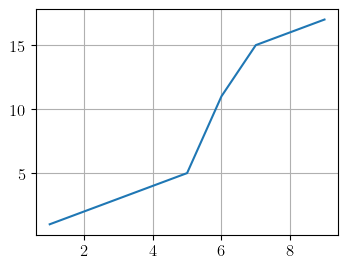

In [38]:
plt.plot(x, y) # avec les configurations de d√©faut + les param√®tres qu'on a d√©finit au d√©but

tbh tu peux regarder la documentation pour plus de modifications de couleur etc. parce que vraiment the possibilities are endless. tu peux faire tout ce que tu veux. mais la taille des points c'est le plus important:

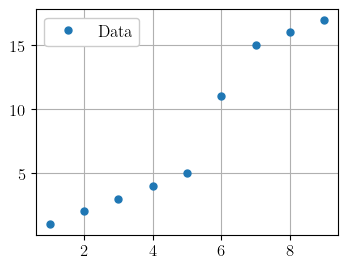

In [39]:
ms = 10 # change la taille des points
plt.plot(x, y, '.', ms=ms, label='Data')
plt.legend() # affiche la l√©gende, documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

J'AI OUBLI√â DE LABEL MES AXES => IVA VA ME TUER

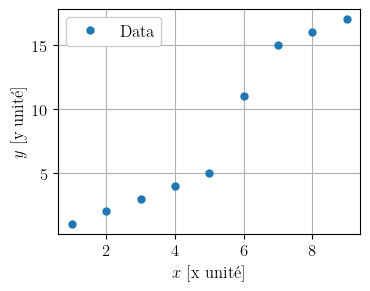

In [40]:
ms = 10 
plt.plot(x, y, '.', ms=ms, label='Data')
plt.legend()
plt.xlabel('$x$ [x unit√©]') # grandeur en italiques, mais son unit√© non
                            # tout ce qui est entre `$ ... $` va etre formatt√© en latex.
                            # ATTENTION: les erreurs de latex sont souvent tr√®s obscures a decoder (voir prochaine cellule)
plt.ylabel('$y$ [y unit√©]')
plt.savefig('image.pdf') # sauvegarde le graphe en pdf sous le nom "image.pdf"
# c'est joli les pdfs parce que c'est jamais pixel√©, mais tu peux remplacer le .pdf pour un .png aussi
# (utile pour des figures avec BEAUCOUP de donne√©s)

Quelques conseils pour le latex dans les plots / sur python

In [41]:
# Pour faire des strings avec du latex:
r"$\LaTeX$ hors latex $dans latex$" 
# le r"..." permet de dire de ne pas interpreter les "\..." comme des caracteres sp√©ciaux python
# autrement sans le r"..."
"$\\LaTeX$ hors latex $dans latex$"
# avec des format string, il faut faire attention aux {}:
# pour mettre un "{", il faut tapper "{{"
a = 1
b = 3
assert f"$\\frac{{{a}}}{{{b}}}$" == r"$\frac{1}{3}$"  # assert fait une erreur si l'√©galit√© n'est pas vraie

# Erreur obscure a savoir reconnaitre
plt.xlabel(r"$\invalide$ [u.a.]")
# Error in callback <function _draw_all_if_interactive at 0x7f4f1571f9c0> (for post_execute), with arguments args (),kwargs {}:

plt.gcf().clear()  # √©vite d'afficher les erreurs cette fois en supprimant la figure

<Figure size 390x292.5 with 0 Axes>

## 5. Analyse des donn√©es

### 5.1. Faire un fit

m√©thode la plus facile + commune -> np.polyfit() 

documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html pour les d√©tails

In [42]:
degree_of_fit = 1 # droite, 2 pour quadratique etc
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)

# polynome_output contient [a,b] t.q. y = a*x+b pour data donn√©es en argument √† la fonction
a = polynome_output[0]
b = polynome_output[1]

# erreurs
# les erreurs sur les coefficients sont sqrt(matrice_covariante[0,0]) et sqrt(matrice_covariante[1,1]) 
# dcp la diagonale √† la racine carree
# don't ask me why tbh, it's something that you'll see in data and proba stat mais j'ai pas trop √©cout√© en cours (skill diff @Lucia)

da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])
# ou encore plus court:
da, db = np.sqrt(np.diag(matrice_covariante))

print(a, da, b, db) # voil√† ton fit

2.283333333333334 0.2426975821925644 -3.1944444444444446 1.365735584242801


pour plot le fit avec les donn√©es

Text(0, 0.5, '$y$ [y unit√©]')

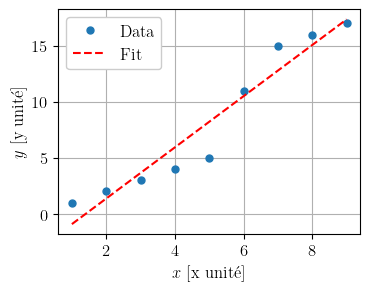

In [43]:
# copi√© d'en haut
ms = 10
plt.plot(x, y, '.', ms=ms, label='Data')

# plot le fit
truc = np.linspace(x[0], x[-1], 10) # cr√©e un array de 10 √©l√©ments distribu√©s uniform√©ment dans l'intervalle [x[0], x[-1]] 
                             # avec x[-1] le dernier √©lement de l'array x
# cet array nous permet de plotter le fit en faisant
plt.plot(truc, a*truc+b, 'r--', label='Fit') # en g√©n√©ral on plotte le fit en pointill√© et dans une couleur dif∆í√©rente
                                             # Tom: je pr√©fere perso les mettre en soit en noir ('k--'), soit la couleur des points s'il y plusieurs fits
# faut aussi √©crire l'√©quation du fit en l√©gende tout le temps

plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')

tous les assistants on des opinions diff√©rentes sur les conventions d'√©crire l'√©quation d'un fit. le plus safe c'est de faire √ßa


Text(0, 0.5, '$y$ [y unit√©]')

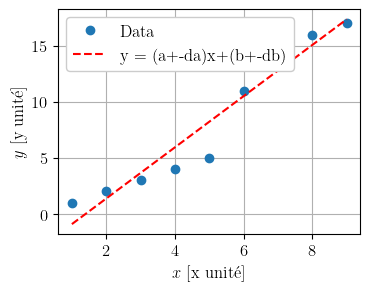

In [44]:
# sans latex, en vrai c'est moche sans latex, stp installe latex sur ton ordi --> https://www.latex-project.org/get/ / https://www.tug.org/texlive/
plt.plot(x, y, '.', label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label='y = (a+-da)x+(b+-db)') # l√©gende moche et cause l√©gende overlap avec points => super bad all the time
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')

Text(0, 0.5, '$y$ [y unit√©]')

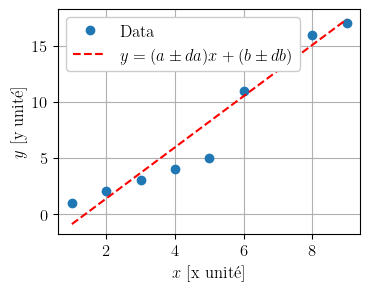

In [45]:
# avec latex
plt.plot(x, y, '.', label='Data')
truc = np.linspace(x[0], x[-1], 10)
# en r√©alit√© il y a pas √† d√©finir le linspace dans chaque bulle, le jupyter notebook se rappelle des variables
# faut juste pas nommer deux variables avec le meme nom
# et s'assurer que la variable est d√©finie avant son utilisation
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a \pm da)x+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')
# ATTENTION: LA LEGENDE OVERLAP ICI PAS BIEN POUR RAPPORTS
# pour r√©gler il faut jouer avec la taille de la figure et la taille de la l√©gende par rapport √† la figure

(on va ignorer le fait que j'ai pas vraiment √©crit les valeurs du fit parce que j'ai pas vraiment trouv√© de mani√®re d'optimiser l'arrondi des valeurs sans d'autres libraries et √ßa fuck tout et c'est un peu chiant de d√©finir l'utilisation de la librarie uncertainties et c'est juste pas tr√®s important)

(pendant tout le ba3 et ba4 j'ai juste pass√© ma vie a print les valeurs des coeffs et de leurs erreurs, et faire les arrondis dans ma t√™te. puis √©crire les valeurs dans l'argument label de la fonction plt.plot correspondante)

Text(0, 0.5, '$y$ [y unit√©]')

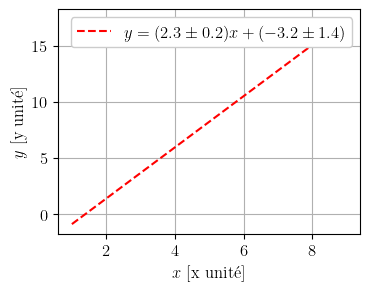

In [46]:
# tom: pour fixer le skill diff de Lucia: 
# lucia: :'(
plt.plot(truc, a*truc+b, 'r--', label=r'$y = ({:.1f} \pm {:.1f})x+({:.1f} \pm {:.1f})$'.format(a, da, b, db))
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')

### 5.2. Plusieurs fits au m√™me temps

a bit self explanatory, mais c'est cool de le voir

Text(0, 0.5, '$y$ [y unit√©]')

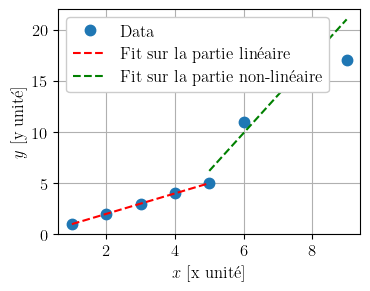

In [47]:
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x[0:4], y[0:4], deg=degree_of_fit, cov=True) # partie lin√©aire
polynome_output2, matrice_covariante2 = np.polyfit(x[4:-1], y[4:-1], deg=degree_of_fit, cov=True) # partie non lin√©aire dcp un peu con de faire un fit lin√©aire mais bon

a = polynome_output[0]
b = polynome_output[1]
a2 = polynome_output2[0]
b2 = polynome_output2[1]

da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])
# ou
da, db = np.sqrt(np.diag(matrice_covariante))
da2 = np.sqrt(matrice_covariante2[0][0])
db2 = np.sqrt(matrice_covariante2[1][1])
# ou
da2, db2 = np.sqrt(np.diag(matrice_covariante2)) # tom il utilise des tricks fancy mdr

truc = np.linspace(x[0], x[4], 10)
truc2 = np.linspace(x[4], x[-1], 10)

plt.plot(x, y, '.', ms=15, label="Data")
plt.plot(truc, a*truc+b, 'r--', label='Fit sur la partie lin√©aire')
plt.plot(truc2, a2*truc2+b2, 'g--', label='Fit sur la partie non-lin√©aire')
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')
# et encore une fois les param√®tres de tom causent des overlap entre les points et la l√©gende
# en vrai mc tu vas passer ta vie √† r√©gler les probl√®mes comme √ßa c'est super chiant

### 5.3. Faire un fit arbitraire

de temps en temps il faut faire un fit d'une fonction sp√©ciale sur tes r√©sultats, genre des $A e^{-\lambda t}\cos(\omega t + \varphi)$

(lucia: j'ai eu la flemme de ressortir mes tps pour trouver comment faire √ßa, merci tommm)

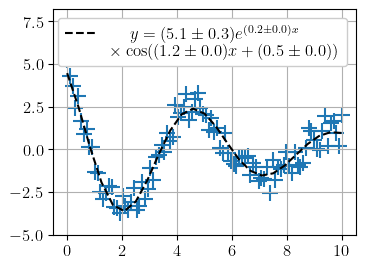

In [48]:
fake_data_x = np.linspace(0, 10, 100)
fake_data_y = 5 * np.exp(-0.15 * fake_data_x) * np.cos(1.23 * fake_data_x + np.pi/6) + (np.random.random(fake_data_x.shape) - 0.5) * 2
plt.scatter(fake_data_x, fake_data_y, marker='+')

# fonction a fit
def func_to_fit(t, A, lmbda, omega, phi):  # !! lambda est un mot reserv√© !!
    return A * np.exp(-lmbda * t) * np.cos(omega * t + phi)

# faire le fit
coefs, cov = sc.optimize.curve_fit(func_to_fit, fake_data_x, fake_data_y)
A, lmbda, omega, phi = coefs
dA, dLmbda, dOmega, dPhi = np.sqrt(np.diag(cov))
fitx = np.linspace(0, 10, 25)
fity = func_to_fit(fitx, *coefs)  # *coefs met tous les coefs au bon endroit dans l'appel, equivalent a faire `A, lmbda, omega, phi`
# bien mettre la fonction dans la legende / le latex. pour les retours a la ligne: "\\".
# oui c'est chiant a tapper. non il n'y a pas vraiment de meilleure option
plt.plot(
    fitx, fity, 'k--',
    label=r"$y = ({:.1f} \pm {:.1f}) e^{{({:.1f} \pm {:.1f}) x}} \\ \times \cos(({:.1f} \pm {:.1f}) x + ({:.1f} \pm {:.1f}))$".format(A, dA, lmbda, dLmbda, omega, dOmega, phi, dPhi)
)
# pour eviter que la legende overlap, il faut bidouiller
plt.ylim(-5, 8.2)
plt.legend()

### 5.4. Barres d'erreur (!!!! Important !!!!)

documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

Pour les premiers petits tps je crois qu'ils s'en foutent si tu fais des barres d'erreur, mais si t'as une erreur connue tu dois la mettre. sauf si elle est pas visible ou si tu veux si elle est constante. Sauf si c'est chiant, c'est cool de mettre les barres si elles sont visibles, juste parce que it shows that you care.

Sinon, la phrase typique dans les rapports c'est aussi de dire *"Les erreurs sur les donn√©es √©taient constantes √† 0.12. Donc, elles ne figurent pas sur le graphique."* OU *"Les barres d'erreur sur les donn√©es ne sont pas visibles. Donc, elles ne figurent pas sur les graphiques."* OU *"Par souci de clart√©, les barres d'erreurs sont omises sur ce graphique"*

Text(0, 0.5, '$y$ [y unit√©]')

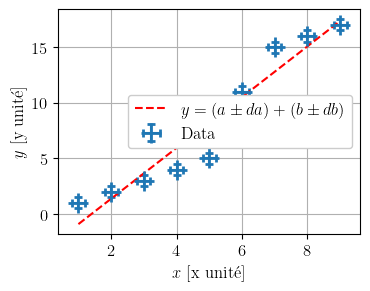

In [49]:
# fit
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)
a = polynome_output[0]
b = polynome_output[1]
da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])

# erreurs
erreur_x = 0.2 # par exemple
erreur_y = 0.5
dx = erreur_x*np.ones_like(x) # d√©fini un array de la m√™me taille que x avec des 1s dans chaque position, 
                              # et apr√®s on multiplie par la valeur de l'erreur
dy = erreur_y*np.ones_like(y) # idem

# plot 
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data') # capsize controle la taille des petites barres au bouts
# ordre d'arguments un peu fucked mais oui c'est plt.errorbar(x, y, erreur de y, erreur de x, ...)
# souvent on s'en tape de l'erreur en x par contre, tu peux juste enlever "dx" dans ce cas
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')


pour les erreurs qui varient

Text(0, 0.5, '$y$ [y unit√©]')

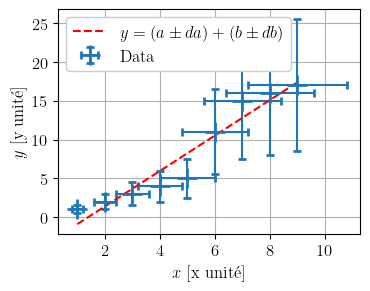

In [50]:
# fit
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)
a = polynome_output[0]
b = polynome_output[1]
da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])

# erreurs
erreur_relative_x = 0.1 # par exemple
erreur_relative_y = 0.1
dx = erreur_x*np.ones_like(x)*x
dy = erreur_y*np.ones_like(y)*y

# plot
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')


mdr c'est un peu extreme les derni√®res barres d'erreurs, si t'as qqch comme √ßa c'est euhh inquietant. mais tkt demande √† d'autres personnes qui ont d√©j√† fait le tp ou envoie un mail √† l'assistant. peut etre que c'est normal (probablement pas mdr)

tom: ca m'est deja arriv√©, c'est pas trop grave en vrai, il faut juste discuter des sources d'erreurs / reverifier la formule d'erreur / donn√©es(?) / v√©rifier avec d'anciens rapports

lucia: en vrai √ßa s'accepte mais il faut etre s√ªr. mon probl√®me c'est qu'un assistant voit √ßa et tu l'expliques pas bien, alors il te dit que c'est des erreurs trop grandes et que tu t'es tromp√©. mais oui d√©finitivement √ßa m'est arriv√© d'avoir des erreurs encore plus que grands que √ßa mdr (üíÄ 5000% d'erreur mdr, √ßa c'est pas normal)

## 6. Fonctions int√©ressantes

### 6.1. Graphiques

#### 6.1.1. Limites des axes
documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(), plt.ylim()

controller o√π tu veux couper le graphique, dcp si tu veux que montrer jusqu'√† 5m dans l'√©chelle de l'axe x tu fais:   plt.xlim(0,5)

(0.0, 8.0)

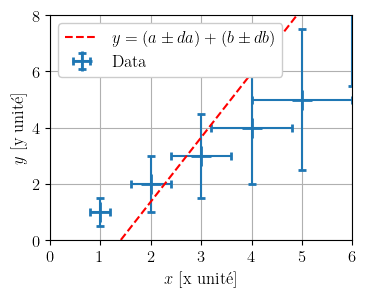

In [51]:
# exemple
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unit√©]')
plt.ylabel('$y$ [y unit√©]')
plt.xlim(0, 6)
plt.ylim(0, 8)

#### 6.1.2. Tracer des droites facilement


documentation hlines (horizontal): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html

documentation vlines (vertical): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html

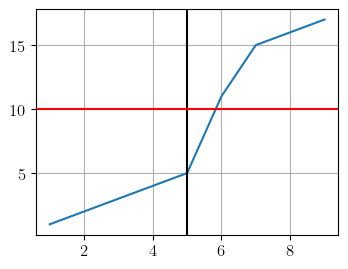

In [52]:
plt.plot(x, y)
plt.axvline(5, color='k')
plt.axhline(10, color='r')

#### 6.1.3. Scientific format for axis


documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0)) --> puts y axis ticks in scientific format

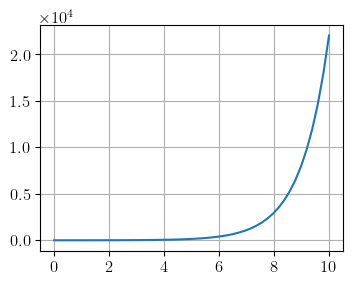

In [53]:
data_x = np.linspace(0, 10)
data_y = np.exp(data_x)
plt.plot(data_x, data_y)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#### 6.1.4. Echelle logarithmique

documentation: https://matplotlib.org/stable/users/explain/axes/axes_scales.html

de temps en temps il faut montrer une relation exponentielle et non lin√©aire pour tes datas, alors pour faire un plot avec echelle logarithmique

`plt.loglog(x, y, ...)` ou `plt.semilogx(x, y, ...)` (pour l'axe x en log) ou `plt.semilogy(x, y, ...)` (tu comprends) ou `plt.yscale('log')`

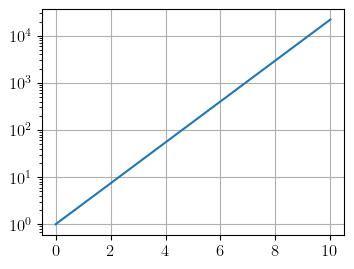

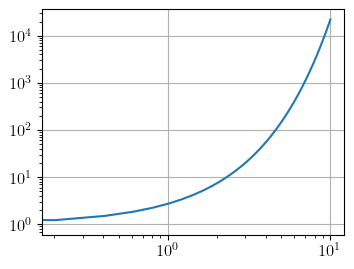

In [54]:
plt.plot(data_x, data_y)
plt.yscale('log')
plt.show()
# ou
plt.loglog(data_x, data_y)  # memes arguments que plt.plot

#### 6.1.5. Comment trouver un point graphiquement? petit tuto

En mettant une couleur diff√©rente pour une partie limit√© des points, on peut trouver l'indice du vector d'un certain point.

C'est particuli√®rement utile si t'essayes de trouver l'indice d'un point pour une certaine valeur et t'as des centaines de points.

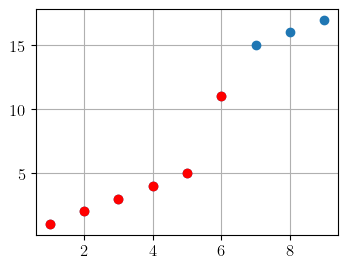

In [55]:
ms = 12
n = 6 # change √ßa √† 4 ou 9 par exemple, pour voir ce que je veux dire
plt.plot(x, y, '.', ms=ms)
plt.plot(x[:n], y[:n], 'r.', ms=ms) 

## 7. Le calcul d'incertitudes, c'est chiant

Alors laissons python le faire!

Il y a une librairie qui s'appelle uncertainties (documentation: https://uncertainties.readthedocs.io/en/latest/) qui est vraiment pas mal (faut apprendre a s'en servir et faire attention avec certaines fonctions mais autrement c'est pas mal)

lucia: perso √ßa m'a fait trop chier d'essayer d'apprendre √† l'utiliser pendant le semestre quand j'avais d√©j√† mes propres habitudes. dcp il faut juste choisir soit de l'utiliser et faire un peu d'effort pour qu'apr√®s √ßa soit tr√®s tr√®s facile. soit give up and suffer comme moi

In [56]:
import uncertainties as uc
import uncertainties.unumpy as unp

In [57]:
# Une valeur avec incertitude
a = uc.ufloat(42, 0.69)
a

42.0+/-0.69

In [58]:
# r√©cuperer valeur (nominal_value) et incertitude (standard_deviation)
a.n, a.s

(42.0, 0.69)

In [59]:
# Toutes les operations fonctionnent toujours
print(a + 27)
b = uc.ufloat(32, 2.6)
print(a+b)
print(a/b)
# pour toutes les fonctions maths, utiliser unumpy.(...)
print(unp.cos(a))
print(unp.arctanh(b / 100))

69.0+/-0.7
74.0+/-2.7
1.31+/-0.11
-0.4+/-0.6
0.332+/-0.029


In [60]:
# On peut la formatter tres facilement: https://uncertainties.readthedocs.io/en/latest/formatting.html
# 2 chiffres significatif
print(f"{a:.2u}")

# 1 chiffre significatif (1u), notation scientifique (e)
print(f"{a:.1ue}")

# avec formattage latex (pratique pour les legendes dans matplotlib!)
print(f"{a:.1ueL}")

# avec un formattage "beau"
print(f"{a:.1ueP}")

# forcer avec des parentheses autour (comme Iva le veut toujours!)
print(f"{a:.2up}")

42.00+/-0.69
(4.20+/-0.07)e+01
\left(4.20 \pm 0.07\right) \times 10^{1}
(4.20¬±0.07)√ó10¬π
(42.00+/-0.69)


In [61]:
# Faire des array (numpy) de ufloat, c'est possible
# un array de valeur / erreur
a = unp.uarray((0, 1, 2, 3, 4), (0.1, 0.2, 0.258, 0.5, 0.8))
a

array([0.0+/-0.1, 1.0+/-0.2, 2.0+/-0.258, 3.0+/-0.5, 4.0+/-0.8],
      dtype=object)

In [62]:
# Les op√©rations ca marche toujours
print(unp.cos(a))
b = np.copy(a) + uc.ufloat(42, 5.6) - 5
print(a + b)

[1.0+/-0 0.5403023058681398+/-0.16829419696157932
 -0.4161468365471424+/-0.23459873612102589
 -0.9899924966004454+/-0.0705600040299336
 -0.6536436208636119+/-0.6054419962463427]
[37.0+/-5.60357029044876 39.0+/-5.61426753904728 41.0+/-5.623722610513431
 43.0+/-5.688585061331157 45.0+/-5.824087911424414]


<ErrorbarContainer object of 3 artists>

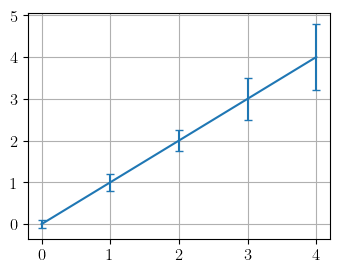

In [63]:
# pour donner a matplotlib (ou d'autres fonctions quand ca marche pas (scipy par exemple)), il faut extraire les valeurs et incertitudes
# c'est un peu chiant mais ca passe
valeurs_a = unp.nominal_values(a)
incertitudes_a = unp.std_devs(a)
plt.errorbar(range(5), valeurs_a, incertitudes_a)

---
Made with ‚ù§Ô∏è by
- @Lucia: quasiment tout
- [@Tom](https://github.com/TomVdt): revisions, exemples concrets, uncertainties